In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from collections import defaultdict
import glob

import networkx as nx
from chess import pgn

g = nx.DiGraph()
global_stats = defaultdict(lambda : defaultdict(int))

for fname in glob.glob("data/*.pgn"):
    with open(fname) as fin:
        for __, header in pgn.scan_headers(fin):
            w = header["White"].split(",")[0]
            b = header["Black"].split(",")[0]
            if not g.has_edge(w, b):
                g.add_edge(w, b, win=0, loss=0, draw=0)
            if not g.has_edge(b, w):
                g.add_edge(b, w, win=0, loss=0, draw=0)
            
            # g[w][b]["loss"] is # of losses b has against w.
            # So g[w] holds the rankings from subset of games against w.
            if header["Result"] == "0-1":
                g[w][b]["loss"] += 1
                g[b][w]["win"] += 1
                global_stats[w]["win"] += 1
                global_stats[b]["loss"] += 1
            elif header["Result"] == "1-0":
                g[w][b]["loss"] += 1
                g[b][w]["win"] += 1
                global_stats[w]["win"] += 1
                global_stats[b]["loss"] += 1
            elif header["Result"] == "1/2-1/2":
                g[w][b]["draw"] += 1
                g[b][w]["draw"] += 1
                global_stats[w]["draw"] += 1
                global_stats[b]["draw"] += 1
            else:
                print(header["Result"])

In [3]:
def points(stats):
    num_games = stats["win"] + stats["loss"] + stats["draw"]
    return (stats["win"] + 0.5 * stats["draw"]) / num_games

In [4]:
for w, b in g.edges_iter():
    g[w][b]["weight"] = points(g[w][b])

In [5]:
global_scores = pd.Series({k: points(v) for k, v in global_stats.items()})
scores = pd.DataFrame({w: {k: points(v) for k, v in edge.items()} 
                         for w, edge in g.edge.items()})

In [6]:
rank_diff = pd.DataFrame(index=scores.index)
for column in scores:
    local_scores = scores[column].dropna()
    rank_diff[column] = global_scores[local_scores.index].rank() - local_scores.rank()
rank_diff

,Adams,Anand,Aronian,Bacrot,Bartel,Bologan,Carlsen,Caruana,Dominguez Perez,Fridman,...,Ponomariov,Radjabov,Svidler,Tomashevsky,Topalov,Vallejo Pons,Van Wely,Vitiugov,Wang,Wang Hao
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,4.5
Anand,NaN,NaN,-6.5,NaN,NaN,NaN,3.0,-9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
Aronian,NaN,2.5,NaN,NaN,NaN,NaN,16.0,5.0,NaN,NaN,...,NaN,6.5,NaN,4.0,9.5,3.0,6.0,NaN,NaN,NaN
Bacrot,NaN,NaN,NaN,NaN,NaN,0.5,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Bartel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-24.0,NaN,-2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bologan,NaN,NaN,NaN,-2.5,NaN,NaN,-9.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.5,NaN
Carlsen,NaN,-1.0,0.5,1.5,NaN,1.5,NaN,10.0,NaN,NaN,...,NaN,12.0,NaN,2.5,-2.5,2.0,4.5,NaN,5.5,NaN
Caruana,NaN,0.5,10.0,NaN,6.0,NaN,5.0,NaN,12.0,-0.5,...,10.0,4.5,3,-3.0,12.5,-1.5,3.0,2,12.0,NaN
Dominguez Perez,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,-17.5,NaN,NaN,...,4.0,NaN,-3,NaN,5.5,NaN,NaN,NaN,-6.0,-1.0
Fridman,NaN,NaN,NaN,NaN,-3.0,NaN,NaN,-1.5,NaN,NaN,...,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


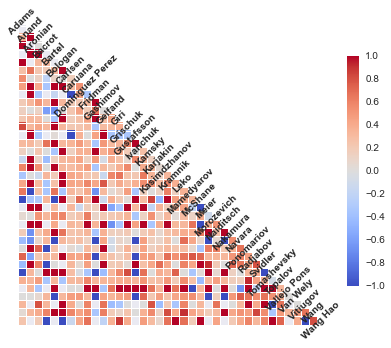

In [7]:
sns.corrplot(rank_diff, annot=False, sig_stars=False, method="kendall")

In [8]:
def tau_sum(df):
    return (df.corr(method="kendall") ** 2).sum().sum()
τ = tau_sum(rank_diff)
τ

436.11256700878477

(array([  4.,   5.,   2.,  11.,  19.,  24.,  26.,  40.,  52.,  39.,  70.,
         72.,  83.,  81.,  83.,  80.,  74.,  53.,  38.,  44.,  30.,  18.,
         16.,  11.,   4.,   6.,  10.,   3.,   1.,   1.]),
 array([ 308.59239713,  311.80189705,  315.01139697,  318.22089689,
         321.43039681,  324.63989673,  327.84939665,  331.05889657,
         334.26839649,  337.47789641,  340.68739633,  343.89689625,
         347.10639617,  350.31589609,  353.52539601,  356.73489593,
         359.94439585,  363.15389577,  366.36339569,  369.57289561,
         372.78239553,  375.99189545,  379.20139537,  382.41089529,
         385.62039521,  388.82989512,  392.03939504,  395.24889496,
         398.45839488,  401.6678948 ,  404.87739472]),
 <a list of 30 Patch objects>)

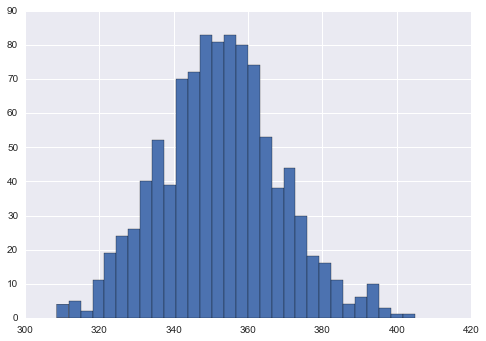

In [9]:
d = rank_diff.as_matrix().copy()

def permute(d):
    for col in range(d.shape[1]):
        d[:, col] = np.random.permutation(d[:, col])
    return d

t = np.array([tau_sum(pd.DataFrame(permute(d)))
              for i in range(1000)])
plt.hist(t, bins=30)